In [45]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns


In [47]:
order=pd.read_csv('Data/train1.csv')

In [48]:
order.describe()

region_id           slot            gap          order  \
count  199584.00000  199584.000000  199584.000000  199584.000000   
mean       33.50000      72.500000       7.598104      42.792078   
std        19.05042      41.568321      45.229539     103.652317   
min         1.00000       1.000000       0.000000       0.000000   
25%        17.00000      36.750000       0.000000       1.000000   
50%        33.50000      72.500000       1.000000       7.000000   
75%        50.00000     108.250000       3.000000      32.000000   
max        66.00000     144.000000    3872.000000    4362.000000   

              sumgap        WeekDay        Weather           Temp  \
count  199584.000000  199584.000000  199584.000000  199584.000000   
mean     1094.126984       3.000000       2.502024       5.367329   
std      3100.716422       2.000005       1.882603       3.955454   
min         8.000000       0.000000       0.000000       0.000000   
25%        73.000000       1.000000       2.000000       1.000000   
50%       155.000000       3.000000       2.000000       5.000000   
75%       697.000000       5.000000       4.000000       8.000000   
max     58704.000000       6.000000       9.000000      19.000000   

                PM25       POI_Sum  
count  199584.000000  1.995840e+05  
mean       97.471065  2.964874e+05  
std        64.411942  5.219022e+05  
min         6.000000  2.988000e+03  
25%        49.000000  5.079600e+04  
50%        98.000000  1.011770e+05  
75%       143.000000  2.546440e+05  
max       276.000000  3.340833e+06

In [49]:
order.head()

region_id  slot   gap  order  sumgap  WeekDay  Weather  Temp   PM25  \
0        1.0   1.0   9.0  187.0  2372.0      4.0      1.0   3.0  177.0   
1        1.0   2.0   7.0  198.0  2372.0      4.0      1.0   3.0  177.0   
2        1.0   3.0  10.0  192.0  2372.0      4.0      1.0   3.0  177.0   
3        1.0   4.0   5.0  172.0  2372.0      4.0      1.0   3.0  177.0   
4        1.0   5.0   1.0  153.0  2372.0      4.0      1.0   3.0  177.0   

    POI_Sum  
0  653376.0  
1  653376.0  
2  653376.0  
3  653376.0  
4  653376.0

In [50]:
print np.sum(order[order.slot==1.0].gap)

5092.0


In [51]:
order.shape

(199584, 10)

In [52]:
order.head()


region_id  slot   gap  order  sumgap  WeekDay  Weather  Temp   PM25  \
0        1.0   1.0   9.0  187.0  2372.0      4.0      1.0   3.0  177.0   
1        1.0   2.0   7.0  198.0  2372.0      4.0      1.0   3.0  177.0   
2        1.0   3.0  10.0  192.0  2372.0      4.0      1.0   3.0  177.0   
3        1.0   4.0   5.0  172.0  2372.0      4.0      1.0   3.0  177.0   
4        1.0   5.0   1.0  153.0  2372.0      4.0      1.0   3.0  177.0   

    POI_Sum  
0  653376.0  
1  653376.0  
2  653376.0  
3  653376.0  
4  653376.0

In [53]:
print order.region_id.shape
print order.slot.shape

(199584L,)
(199584L,)


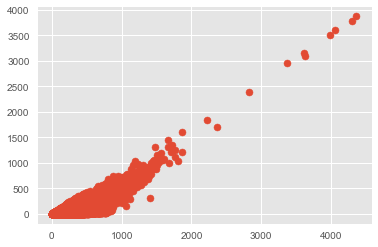

In [54]:
plt.scatter(order.order[:],order.gap[:])

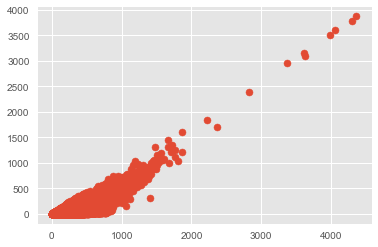

In [55]:
plt.scatter(order.order[:],order.gap[:])

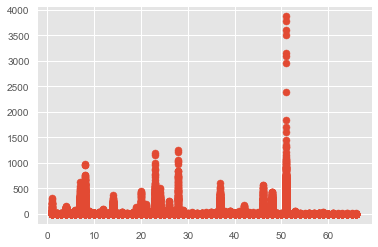

In [56]:
plt.scatter(order.region_id[:],order.gap[:])

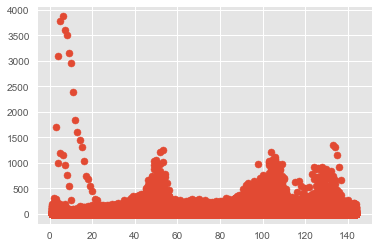

In [57]:
plt.scatter(order.slot,order.gap[:])

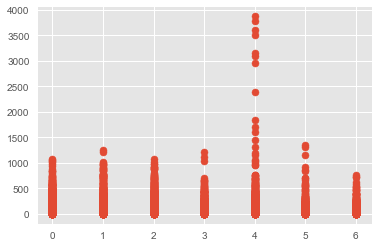

In [58]:
plt.scatter(order.WeekDay ,order.gap)

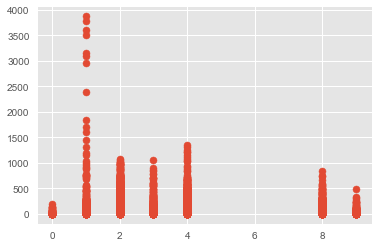

In [59]:
plt.scatter(order.Weather ,order.gap)

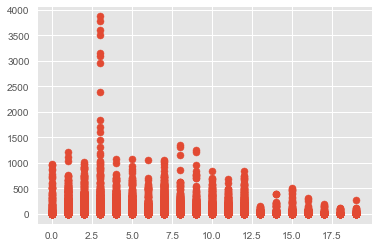

In [60]:
plt.scatter(order.Temp ,order.gap)

In [61]:
#plt.scatter(order.PM25 ,order.gap)

In [62]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from collections import defaultdict

In [63]:
od=np.array(order)

def normalize(a):
    return (a-np.min(a,axis=0))/(np.max(a,axis=0)-np.min(a,axis=0))

In [64]:
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [65]:
for i in range(1,10):
    params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
      'learning_rate': i*0.01, 'loss': 'ls'}
#loss=
    clf = ensemble.GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train)
    print i
    print mean_absolute_error(y_train, clf.predict(X_train))
    mae = mean_absolute_error(y_test, clf.predict(X_test))
    print("MAE: %.6f" % mae)
    

1
5.82690878541
MAE: 6.847125
2
4.27957246269
MAE: 5.004320
3
3.66750593995
MAE: 4.463674
4
3.40398896269
MAE: 4.292148
5
3.2115609464
MAE: 4.144717
6
2.97917893395
MAE: 4.014969
7
2.8906379341
MAE: 3.953784
8
2.75005682235
MAE: 3.739373
9
2.67101317178
MAE: 3.846682


In [66]:
for i in range(5,11):
    params = {'n_estimators': 1000, 'max_depth': i,'min_samples_split': 2,
              'learning_rate': 0.01, 'loss': 'lad'}
    #loss=
    clf = ensemble.GradientBoostingRegressor(**params)

    #clf.fit(X_train, y_train)
    clf.fit(od[:,feat],od[:,2])
    
    mae1 = mean_absolute_error(y_train, clf.predict(X_train))
    mae2 = mean_absolute_error(y_test, clf.predict(X_test))
    print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )


MAE at Train : 3.660849 MEA at Test : 4.102417
MAE at Train : 3.176973 MEA at Test : 3.507320
MAE at Train : 2.999581 MEA at Test : 3.362115
MAE at Train : 2.652225 MEA at Test : 2.972550
MAE at Train : 2.109439 MEA at Test : 2.469301
MAE at Train : 1.874430 MEA at Test : 2.259869


In [67]:
for i in range(5,11):
    params = {'n_estimators': 1000, 'max_depth': i,'min_samples_split': 2,
              'learning_rate': 0.01, 'loss': 'ls'}
    #loss=
    clf = ensemble.GradientBoostingRegressor(**params)

    #clf.fit(X_train, y_train)
    clf.fit(od[:,feat],od[:,2])
    
    mae1 = mean_absolute_error(y_train, clf.predict(X_train))
    mae2 = mean_absolute_error(y_test, clf.predict(X_test))
    print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )


MAE at Train : 2.736940 MEA at Test : 3.062569
MAE at Train : 2.316737 MEA at Test : 2.590344
MAE at Train : 1.997850 MEA at Test : 2.264719
MAE at Train : 1.707336 MEA at Test : 1.923924
MAE at Train : 1.464446 MEA at Test : 1.635745
MAE at Train : 1.280325 MEA at Test : 1.411520


In [68]:
#feat=[0,1,3,5]
feat=[0,1,3,5,6,7,8,9]
X_train=od[:150000,feat]
y_train=od[:150000:,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

params = {'n_estimators': 100, 'max_depth': 10,'min_samples_split': 10,
              'learning_rate': 0.1, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
#clf.fit(od[:,feat],od[:,2])

mae1 = mean_absolute_error(y_train, clf.predict(X_train))
mae2 = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE at Train : %.6f" % mae1) , ("MEA at Test : %.6f" % mae2 )

MAE at Train : 1.259087 MEA at Test : 3.126884


In [69]:
#best MAE : 0.607614 & Train 1.50495836591
# test set : 3.156829

print mean_absolute_error(y_train, clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)


1.25908713885
MAE: 3.126884


In [70]:
a=clf.predict(X_test)
print mean_absolute_error(y_test, a)
a=np.around(a)
print mean_absolute_error(y_test, a)

a[X_test[:,3]==0]=0
print mean_absolute_error(y_test, a)


3.12688417275
3.09343739916
4.04777750887


In [71]:

print mean_absolute_error(y_train, clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)


1.25908713885
MAE: 3.126884


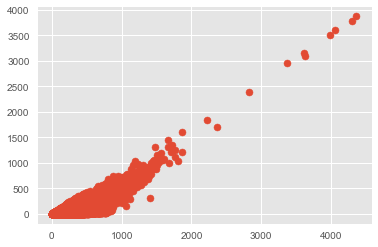

In [72]:
plt.scatter(order.order,order.gap)

In [73]:
order=order[order.gap<1500]

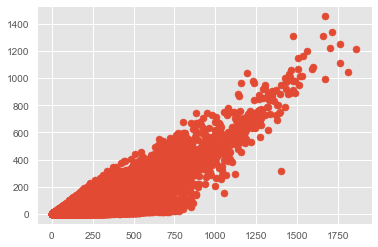

In [74]:
plt.scatter(order.order,order.gap)

In [75]:
order.shape

(199573, 10)

In [76]:
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]
od=np.array(order)
X_train=od[:150000,feat]
y_train=od[:150000,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [77]:
for i in range(5,10):
    params = {'n_estimators': 1000, 'max_depth': i, 'min_samples_split': 10,
          'learning_rate': 0.01, 'loss': 'ls'}

    clf = ensemble.GradientBoostingRegressor(**params)

    clf.fit(X_train, y_train)
    #clf.fit(od[:,feat], od[:,2])

    print 'train', mean_absolute_error (y_train,clf.predict(X_train))
    mae = mean_absolute_error (y_test, clf.predict(X_test))
    print("MAE: %.6f" % mae)


train 2.55617565271
MAE: 3.771497
train 2.17429144285
MAE: 3.622900
train 1.83888193212
MAE: 3.378319
train 1.57012984433
MAE: 3.222426
train 1.37218163607
MAE: 3.117620


In [78]:

params = {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 10,
      'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
clf.fit(od[:,feat], od[:,2])

print 'train', mean_absolute_error (y_train,clf.predict(X_train))
mae = mean_absolute_error (y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)


train 1.30543300908
MAE: 1.451429


In [79]:
print 'train', mean_absolute_error(y_train,clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)

train 1.30543300908
MAE: 1.451429


In [80]:
ans=clf.predict(X_test)

In [81]:
ans=np.around(ans)
mean_absolute_error(y_test,ans)

1.4174449801303128

In [82]:
ans[X_test[:,3]==0]=0
mean_absolute_error(y_test,ans)

2.7622899562261716

In [83]:
print 'train', mean_absolute_error(y_train,clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)

train 1.30543300908
MAE: 1.451429


In [84]:
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)

MAE: 1.451429
